<a href="https://colab.research.google.com/github/64060kbarot/AML_64061/blob/main/AML_Neural_Network_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Assignment 1: Neural Network*
For the IMDB example that we discussed in class, do the following:
1. You used two hidden layers. Try using one or three hidden layers and see how doing so
affects validation and test accuracy.
2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so
on.
3. Try using the mse loss function instead of binary_crossentropy.
4. Try using the tanh activation (an activation that was popular in the early days of neural
networks) instead of relu.
5. Use any technique we studied in class, and these include regularization, dropout, etc., to
get your model to perform better on validation.

*Import IMDB data set from the library tensorflow.keras.dataset*

In [19]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import keras
from keras import layers



In [20]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [21]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

In [22]:
#Decoding Reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [23]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [24]:
#Vectorised Train & Test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [25]:
#Building the Model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [26]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [27]:
#Validating your approach : Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
#Training the model with batch size 512 and 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5477 - accuracy: 0.7709 - val_loss: 0.4248 - val_accuracy: 0.8575
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3434 - accuracy: 0.8897 - val_loss: 0.3277 - val_accuracy: 0.8802
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2578 - accuracy: 0.9137 - val_loss: 0.2895 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2072 - accuracy: 0.9310 - val_loss: 0.2784 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1765 - accuracy: 0.9394 - val_loss: 0.3107 - val_accuracy: 0.8745
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1508 - accuracy: 0.9507 - val_loss: 0.2887 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1333 - accuracy: 0.9564 - val_loss: 0.2933 - val_accuracy: 0.8812
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

*Training and Validation loss graph*


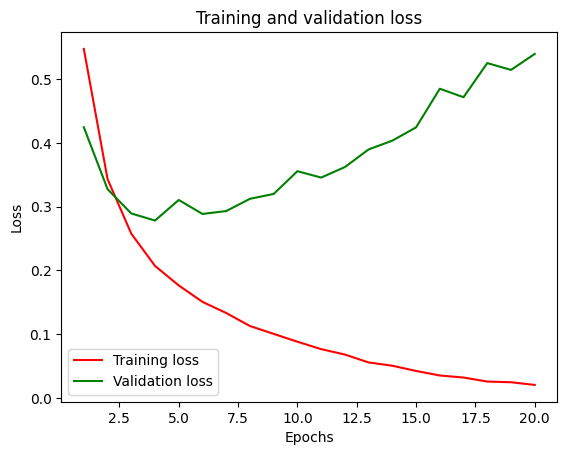

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

*Training and Validation Accuracy*

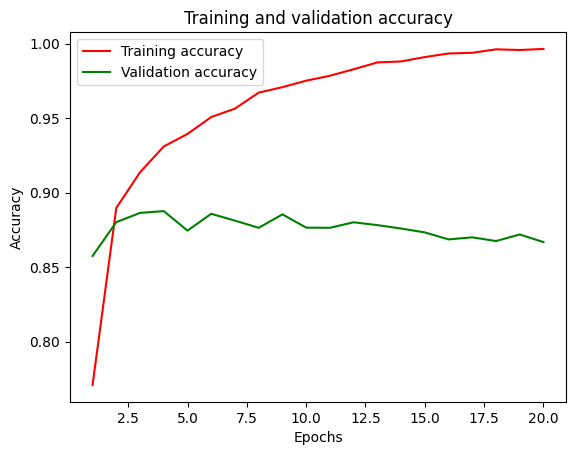

In [30]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

*Building two different model : Model_10epochs and Model_30epochs*

In [31]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
49/49 [==============================] - 1s 13ms/step - loss: 0.4660 - accuracy: 0.8171
Epoch 2/10
49/49 [==============================] - 1s 13ms/step - loss: 0.2739 - accuracy: 0.9022
Epoch 3/10
49/49 [==============================] - 1s 14ms/step - loss: 0.2147 - accuracy: 0.9219
Epoch 4/10
49/49 [==============================] - 1s 14ms/step - loss: 0.1818 - accuracy: 0.9352
Epoch 5/10
49/49 [==============================] - 1s 13ms/step - loss: 0.1587 - accuracy: 0.9448
Epoch 6/10
49/49 [==============================] - 1s 14ms/step - loss: 0.1418 - accuracy: 0.9504
Epoch 7/10
49/49 [==============================] - 1s 14ms/step - loss: 0.1261 - accuracy: 0.9561
Epoch 8/10
49/49 [==============================] - 1s 13ms/step - loss: 0.1131 - accuracy: 0.9618
Epoch 9/10
49/49 [==============================] - 1s 14ms/step - loss: 0.1008 - accuracy: 0.9666
Epoch 10/10
782/782 [==============================] - 2s 3ms/step - loss: 0.3899 - accuracy: 0.8694


In [32]:
results

[0.38990268111228943, 0.8693600296974182]

####Using a train model to genereate prediction on new data

In [33]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.09380091],
       [0.9999815 ],
       [0.49690023],
       ...,
       [0.0981883 ],
       [0.0216782 ],
       [0.7447098 ]], dtype=float32)

In [ ]:
# Install Keras
#!pip install keras

# Import Keras
import keras
from keras import layers

model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=30, batch_size=512)
results = model_2.evaluate(x_test, y_test)

Epoch 1/30
49/49 [==============================] - 2s 19ms/step - loss: 0.4788 - accuracy: 0.7983
Epoch 2/30
49/49 [==============================] - 1s 14ms/step - loss: 0.2786 - accuracy: 0.9036
Epoch 3/30
49/49 [==============================] - 1s 13ms/step - loss: 0.2151 - accuracy: 0.9231
Epoch 4/30
49/49 [==============================] - 1s 13ms/step - loss: 0.1790 - accuracy: 0.9367
Epoch 5/30
49/49 [==============================] - 1s 14ms/step - loss: 0.1557 - accuracy: 0.9458
Epoch 6/30
49/49 [==============================] - 1s 14ms/step - loss: 0.1363 - accuracy: 0.9531
Epoch 7/30
49/49 [==============================] - 1s 13ms/step - loss: 0.1162 - accuracy: 0.9609
Epoch 8/30
49/49 [==============================] - 1s 13ms/step - loss: 0.1011 - accuracy: 0.9665
Epoch 9/30
49/49 [==============================] - 1s 14ms/step - loss: 0.0887 - accuracy: 0.9720
Epoch 10/30
49/49 [==============================] - 1s 14ms/step - loss: 0.0760 - accuracy: 0.9763
Epoch 11/

In [ ]:
results

# ***1.You used two hidden layers. Try using one or three hidden layers and see how doing so affects validation and test accuracy.***

*Model 1.1 Trained with 3 layers*

In [ ]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

In [ ]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_11.fit(x_train, y_train, epochs=10, batch_size=512)
results_M11 = model.evaluate(x_test, y_test)
results_M11

*Model 1.2 Trained with 1 layers*

In [ ]:
model_12 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history4 = model_12.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict4 = history4.history
history_dict4.keys()

In [ ]:
loss_values = history_dict4["loss"]
val_loss_values = history_dict4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

####Plotting graph between Training and Validation accuracyplt.clf()

In [ ]:
acc = history_dict4["accuracy"]
val_acc = history_dict4["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_12.fit(x_train, y_train, epochs=10, batch_size=512)
results_M12 = model.evaluate(x_test, y_test)
results_M12

# ***2.Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.***

*Model_32Units*

In [ ]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict21 = history21.history
history_dict21.keys()

In [ ]:
loss_values = history_dict21["loss"]
val_loss_values = history_dict21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

####Plotting graph between Training and Validation accuracy

In [ ]:
plt.clf()
acc = history_dict21["accuracy"]
val_acc = history_dict21["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_21.fit(x_train, y_train, epochs=10, batch_size=512)
results_M21 = model_21.evaluate(x_test, y_test)
results_M21

*Model_64Units*

In [ ]:
model_22 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_22.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history22 = model_22.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict22 = history22.history
history_dict22.keys()

In [ ]:
loss_values = history_dict22["loss"]
val_loss_values = history_dict22["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict22["accuracy"]
val_acc = history_dict22["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_22.fit(x_train, y_train, epochs=10, batch_size=512)
results_M22 = model_22.evaluate(x_test, y_test)
results_M22

*Model_128Units*

In [ ]:
model_23 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_23.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history23 = model_23.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict23 = history23.history
history_dict23.keys()

In [ ]:
loss_values = history_dict23["loss"]
val_loss_values = history_dict23["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict23["accuracy"]
val_acc = history_dict23["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_23.fit(x_train, y_train, epochs=10, batch_size=512)
results_M23 = model_23.evaluate(x_test, y_test)
results_M23

# ***3.Try using the mse loss function instead of binary_crossentropy.***

In [ ]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

In [ ]:
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_MSE.fit(x_train, y_train, epochs=10, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

# ***4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.***

*Model_Tanh*

In [ ]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

In [ ]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_tanh.fit(x_train, y_train, epochs=10, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

# ***5.Use any technique we studied in class, and these include regularization,dropout, etc., to get your model to perform better on validation.***

*Model_L2_regularization*

In [ ]:
from tensorflow.keras import regularizers
model_regularisation = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.002)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.002)),
    layers.Dense(1, activation="sigmoid")
])
model_regularisation.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_regularisation = model_regularisation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularisation = history_model_regularisation.history
history_dict_regularisation.keys()

In [ ]:
loss_values = history_dict_regularisation["loss"]
val_loss_values = history_dict_regularisation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict_regularisation["accuracy"]
val_acc = history_dict_regularisation["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_regularisation.fit(x_train, y_train, epochs=10, batch_size=512)
results_regularisation = model_regularisation.evaluate(x_test, y_test)
results_regularisation

*Model_Dropout*

In [ ]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

In [ ]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Dropout.fit(x_train, y_train, epochs=10, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

*Training the model with Hypertunned Parameters mentioned above*

In [ ]:
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.0002)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.0002)),
    layers.Dropout(0.2),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0002)),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

In [ ]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Hyper.fit(x_train, y_train, epochs=10, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

# ***Summary***



In [ ]:
All_Loss= np.array([results_M11[0],results_M12[0],results_M21[0],results_M22[0],results_M23[0],results_MSE[0],results_tanh[0],results_regularisation[0],results_Dropout[0],results_Hyper[0]])*100
All_Loss
All_Accuracy= np.array([results_M11[1],results_M12[1],results_M21[1],results_M22[1],results_M23[1],results_MSE[1],results_tanh[1],results_regularisation[1],results_Dropout[1],results_Hyper[1]])*100
All_Accuracy
Labels=['Model_10ephocs','Model_30epochs','Model_32units','Model_64units','Model_128units','Model_MSE','model_tanh','model_regularisation','Model_Dropout','Model_Hyper']
plt.clf()

###**Comparing all models using graph**

In [ ]:
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")
plt.show()

##**Summary:**

Below are the Model description for comparision:
*  **Model_11**(Changed to 3 layers)
*  **Model_12**(Changed to 1 layer)
*  **Model_21**(Chnaged to 32 units of hidden layers)
*  **Model_22**(Chnaged to 64 units of hidden layers)
*  **Model_23**(Chnaged to 128 units of hidden layers)
*  **Model_MSE**(Used MSE loss function)
*  **Model_tanh**(Used tanh activation function)
*  **Model_Regularisation**(L2 regularization with a coefficient of 0.0001 for all your hidden layers)
*  **Model_Dropout**(dropout with a rate of 0.5 after each of the hidden layers)
*  **Model_Hyper**(used all the chnages in one)

**Model Compilation:** The binary cross-entropy loss function is well-suited for evaluating the performance of classification models, where the output represents probabilities between 0 and 1. In contrast, mean squared error (MSE) is commonly used in regression tasks, quantifying how closely a regression line aligns with a set of data points. Squaring the differences between data points and the regression line is essential to ensure that negative discrepancies do not cancel out positive ones.

**From the graphical analysis**, it becomes evident that the highest accuracy and the lowest loss were achieved using the "Model_Hyper." This model employs three deep layers (32, 32, 16) with a dropout rate of 0.5 for each layer. In terms of comparing the MSE loss to other models (excluding the final hypertuned model), it's notable that MSE resulted in minimal loss.

**Units:** As we increase the number of units from 16 to 32, 64, and 128, the accuracy experiences only marginal improvements, while the loss function steadily decreases.

**Hidden Layers:** Interestingly, increasing the number of hidden layers from 1 to 3 had no impact on the loss function, accuracy, or performance.

**Loss Function:** When we employ "mse" as the loss function for the IMDB dataset, the resultant loss value is significantly lower compared to binary cross-entropy, signifying improved convergence.

**Activation Function:** The model's use of the tanh activation function results in lower accuracy, primarily due to issues related to the vanishing gradient problem.

**Regularization:** Contrary to the expected outcome, regularization resulted in a higher loss and decreased accuracy compared to the original model. This observation is somewhat counterintuitive since regularization is typically employed to mitigate overfitting and improve model generalization.

**Dropout:** Dropout regularization also contributes to a diminished loss function but doesn't seem to impact accuracy significantly.